# Customer Segmentation

## Recognize all the Potential Customers by utilizing Recency,Frequency, Monetary Analysis

In [1]:
# IMPORT NECESSARY LIBRARIES: 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [34]:
# LOAD THE DATA - FILE ('Online Retail') IS IN EXCEL FORMAT
customerData = pd.read_excel("Online Retail.xlsx")

In [35]:
customerData.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
customerData.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [37]:
# DATAFRAME INFORMATION:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [38]:
customerData = customerData[pd.notnull(customerData['CustomerID'])]

In [39]:
# REMOVE DUPLICATE DATA ENTRIES:
filtered_customerData = customerData[['Country','CustomerID']].drop_duplicates()

### Data Insights: 

Text(0, 0.5, 'Frequency')

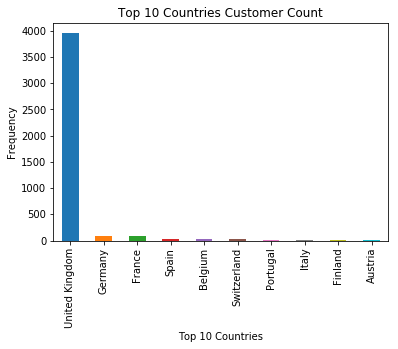

In [40]:
# TOP 10 Country's Customer
filtered_customerData.Country.value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Countries Customer Count')
plt.xlabel('Top 10 Countries')
plt.ylabel('Frequency')

In [41]:
UK_Customers = customerData[customerData.Country =='United Kingdom']

In [42]:
UK_Customers.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [43]:
UK_Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      361878 non-null object
StockCode      361878 non-null object
Description    361878 non-null object
Quantity       361878 non-null int64
InvoiceDate    361878 non-null datetime64[ns]
UnitPrice      361878 non-null float64
CustomerID     361878 non-null float64
Country        361878 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [44]:
UK_Customers.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [45]:
UK_Customers = UK_Customers[(UK_Customers['Quantity']>0)]
UK_Customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [46]:
UK_Customers = UK_Customers[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [47]:
UK_Customers['TotalPrice']=UK_Customers['Quantity']*UK_Customers['UnitPrice']

In [48]:
UK_Customers['InvoiceDate'].min(), UK_Customers['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

In [49]:
Present = datetime.datetime(2019,8,21)

In [50]:
UK_Customers['InvoiceDate'] = pd.to_datetime(UK_Customers['InvoiceDate'])

In [51]:
UK_Customers.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


### RFM ANALYSIS 

• RECENCY = Calculate the Number of days between the present date and date of last purchase for each and every customer

• FREQUENCY = Calculate the number of orders of each customer

• MONETARY = Calculate sum of purchase price for each customer 

In [52]:
rfm_analysis = UK_Customers.groupby('CustomerID').agg({'InvoiceDate': lambda date:(Present - date.max()).days,
                                             'InvoiceNo': lambda num: len(num),
                                             'TotalPrice': lambda price: price.sum()})

In [53]:
rfm_analysis.columns

Index(['InvoiceNo', 'TotalPrice', 'InvoiceDate'], dtype='object')

In [54]:
rfm_analysis.columns = ['FREQUENCY','MONETARY','RECENCY',]

In [55]:
rfm_analysis.columns

Index(['FREQUENCY', 'MONETARY', 'RECENCY'], dtype='object')

In [56]:
rfm_analysis

,FREQUENCY,MONETARY,RECENCY
CustomerID,,,
12346.0,1,77183.60,3136
12747.0,103,4196.01,2813
12748.0,4596,33719.73,2811
12749.0,199,4090.88,2814
12820.0,59,942.34,2814
12821.0,6,92.72,3025
12822.0,46,948.88,2881
12823.0,5,1759.50,2885
12824.0,25,397.12,2870


In [57]:
rfm_analysis['RECENCY'] = rfm_analysis['RECENCY'].astype(int)

In [58]:
rfm_analysis.head()

,FREQUENCY,MONETARY,RECENCY
CustomerID,,,
12346.0,1,77183.60,3136
12747.0,103,4196.01,2813
12748.0,4596,33719.73,2811
12749.0,199,4090.88,2814
12820.0,59,942.34,2814


• Customers with lowest recency, highest frequency and monetary amounts considered as top customers. 

• qcut() is Quantile-based discretization function. 

• qcut() Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.


In [59]:
rfm_analysis['r_quartile'] = pd.qcut(rfm_analysis['RECENCY'], 4, ['1','2','3','4'])
rfm_analysis['f_quartile'] = pd.qcut(rfm_analysis['FREQUENCY'], 4, ['4','3','2','1'])
rfm_analysis['m_quartile'] = pd.qcut(rfm_analysis['MONETARY'], 4, ['4','3','2','1'])

In [60]:
rfm_analysis.head()

,FREQUENCY,MONETARY,RECENCY,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,1,77183.60,3136,4,4,1
12747.0,103,4196.01,2813,1,1,1
12748.0,4596,33719.73,2811,1,1,1
12749.0,199,4090.88,2814,1,1,1
12820.0,59,942.34,2814,1,2,2


In [61]:
rfm_analysis['RFM_Score'] = rfm_analysis.r_quartile.astype(str) + rfm_analysis.f_quartile.astype(str) + rfm_analysis.m_quartile.astype(str)
rfm_analysis.head()

,FREQUENCY,MONETARY,RECENCY,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,1,77183.60,3136,4,4,1,441
12747.0,103,4196.01,2813,1,1,1,111
12748.0,4596,33719.73,2811,1,1,1,111
12749.0,199,4090.88,2814,1,1,1,111
12820.0,59,942.34,2814,1,2,2,122


In [62]:
# Filtering the best customers

rfm_analysis[rfm_analysis['RFM_Score'] == '111'].sort_values('MONETARY', ascending = False).head()

,FREQUENCY,MONETARY,RECENCY,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
18102.0,431,259657.30,2811,1,1,1,111
17450.0,337,194550.79,2819,1,1,1,111
17511.0,963,91062.38,2813,1,1,1,111
16684.0,277,66653.56,2815,1,1,1,111
14096.0,5111,65164.79,2815,1,1,1,111
